# 기본 임포트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

## 데이터 불러오기

In [2]:
bank = pd.read_csv('bank.csv')
bank.head()

,age,job,married,edu,default,home_loan,personal_loan,contact,month,day,...,campaign_count,pdays,pcampaign_count,pcampaign_result,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# EDA

In [3]:
bank.shape

(41188, 21)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               41188 non-null  int64  
 1   job               41188 non-null  object 
 2   married           41188 non-null  object 
 3   edu               41188 non-null  object 
 4   default           41188 non-null  object 
 5   home_loan         41188 non-null  object 
 6   personal_loan     41188 non-null  object 
 7   contact           41188 non-null  object 
 8   month             41188 non-null  object 
 9   day               41188 non-null  object 
 10  duration          41188 non-null  int64  
 11  campaign_count    41188 non-null  int64  
 12  pdays             41188 non-null  int64  
 13  pcampaign_count   41188 non-null  int64  
 14  pcampaign_result  41188 non-null  object 
 15  emp_var_rate      41188 non-null  float64
 16  cons_price_idx    41188 non-null  float6

## 라벨값 변화 및 추출

In [5]:
bank_x = bank.drop("y", axis=1)

## 기술통계량

In [6]:
bank.describe(include="all")

,age,job,married,edu,default,home_loan,personal_loan,contact,month,day,...,campaign_count,pdays,pcampaign_count,pcampaign_result,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


## 상관관계

In [7]:
 bank.corr()

,age,duration,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign_count,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
pcampaign_count,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor_3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<AxesSubplot:>

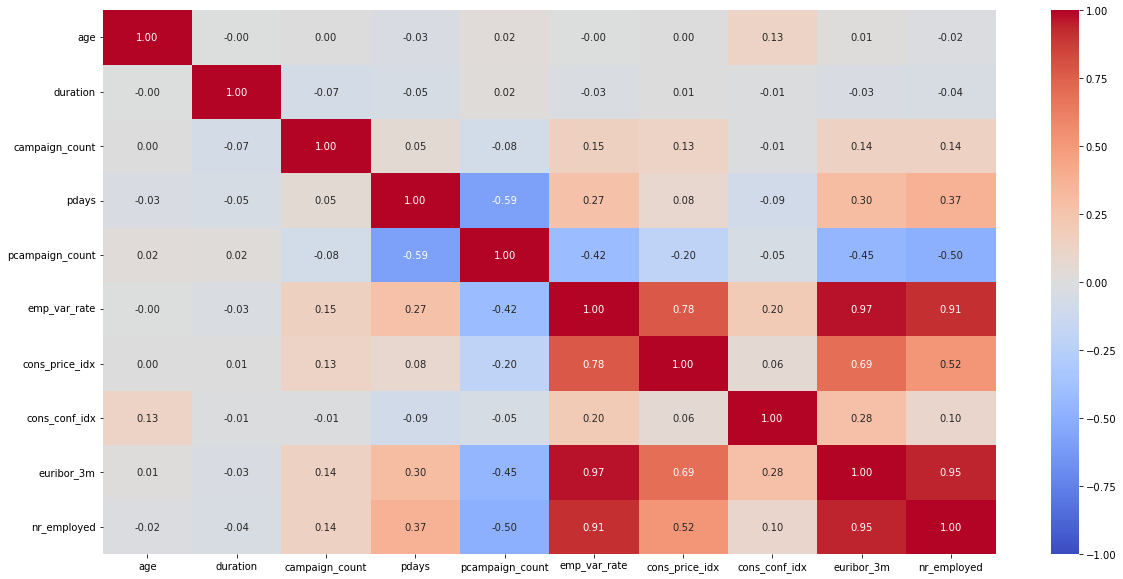

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(bank.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, center= 0, cmap='coolwarm')

## 변수별 개수

In [9]:
for i in range(len(bank.columns)):
    print("value_count(): \n", bank[bank.columns[i]].value_counts())
    print("unique() : ", bank[bank.columns[i]].unique(), "\n")

value_count(): 
 31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
unique() :  [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 

value_count(): 
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
unique() :  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

value_count(): 
 married     24928
single      11568
divorced     4612
unknown        80
Nam

## 명목형, 연속형 나누기

In [10]:
bank_int = bank.loc[:, ['age', 'duration', 'campaign_count', 'pdays', 'pcampaign_count']]
bank_int_name = [var for var in bank.columns if bank[var].dtype == "i8"]

bank_float = bank.loc[:, ['emp_var_rate', 'cons_price_idx', 'euribor_3m', 'nr_employed']]
bank_float_name = [var for var in bank.columns if bank[var].dtype == "f8"]

bank_object = bank.loc[:, ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]
bank_object_name = [var for var in bank.columns if bank[var].dtype == "O"]

## 차트 그리는 함수

### int형 countplot

In [11]:
def countplot_int(data):
    plt.figure(figsize=(20, 10))

    plt.subplot(2, 2, 1)
    sns.countplot(x = data['age']//10, data=data)

    plt.subplot(2, 2, 2)
    sns.countplot(x = data['duration']//60, data=data)

    plt.subplot(2, 2, 3)
    sns.countplot(x = data['campaign_count'], data=data)

    plt.subplot(2, 2, 4)
    sns.countplot(x = data['pcampaign_count'], data=data)

    plt.tight_layout()
    plt.show()

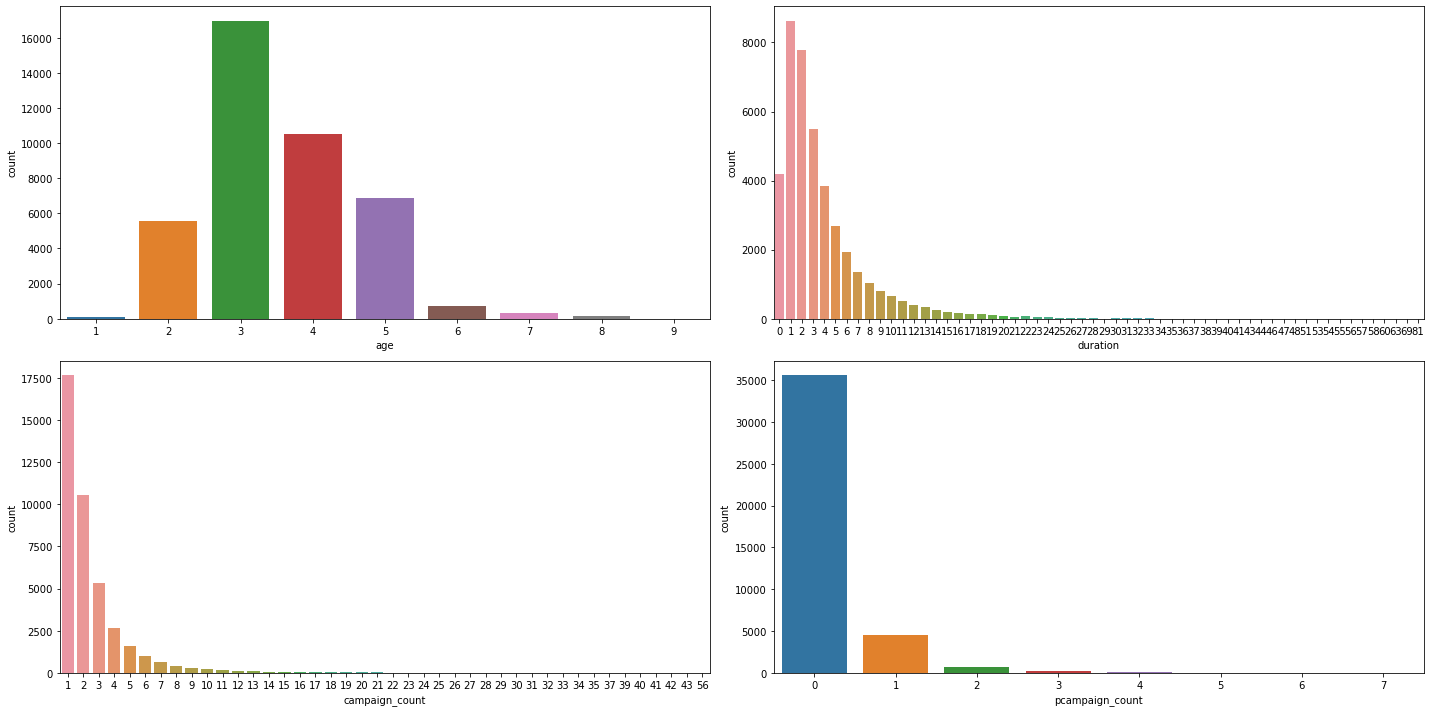

In [12]:
countplot_int(bank_int)

### int형 boxplot

In [13]:
def boxplot_int(data):
    cnt=0
    for i in data:
        sns.boxplot(y = data[i], data = data)
        plt.title(data.columns[cnt])
        cnt+=1
        plt.show()
        print('\n')

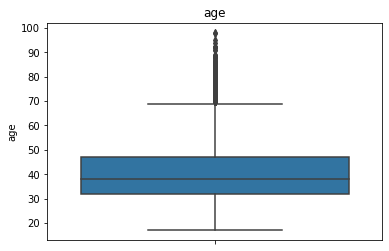

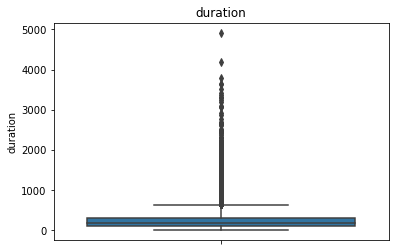

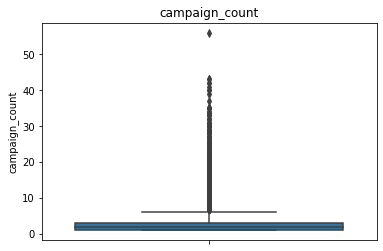

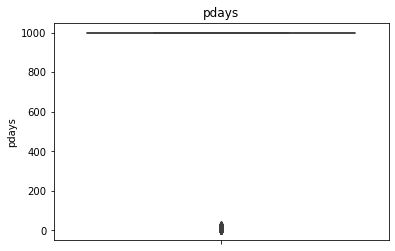

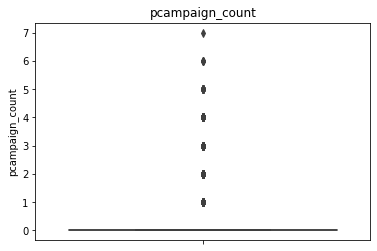

In [14]:
boxplot_int(bank_int)

### float형 boxplot

In [15]:
#float형 boxplot
def boxplot_float(data):
    cnt=0
    for i in data:
        sns.boxplot(y = data[i], data = data)
        plt.title(data.columns[cnt],fontsize=15)
        cnt+=1
        plt.show()
        print('\n')

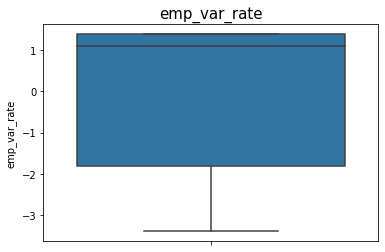

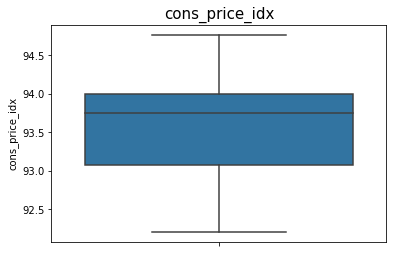

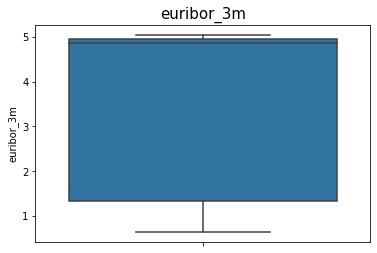

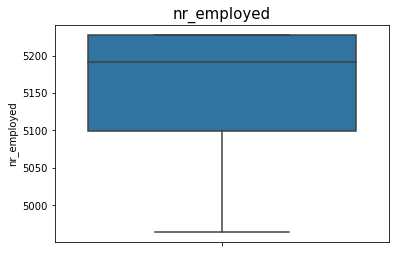

In [16]:
boxplot_float(bank_float)

##### AGE

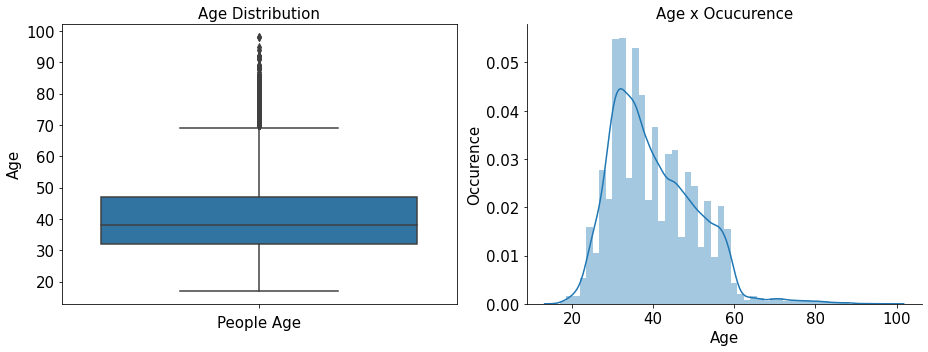

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(y = 'age', data = bank, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [18]:
print('1º Quartile: ', bank['age'].quantile(q = 0.25))
print('2º Quartile: ', bank['age'].quantile(q = 0.50))
print('3º Quartile: ', bank['age'].quantile(q = 0.75))
print('4º Quartile: ', bank['age'].quantile(q = 1.00))

print('Ages above: ', bank['age'].quantile(q = 0.75) + 
                      1.5*(bank['age'].quantile(q = 0.75) - 
                           bank['age'].quantile(q = 0.25)), 
      'are outliers')
print(f"outliers:{round(len(bank[bank['age']>69.5])/len(bank['age'])*100,2)}%")

print(f"AGE MEAN : {round(bank['age'].mean(),1)}")
print(f"AGE STD  : {round(bank['age'].std(),1)}")

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers
outliers:1.14%
AGE MEAN : 40.0
AGE STD  : 10.4


##### DURATION

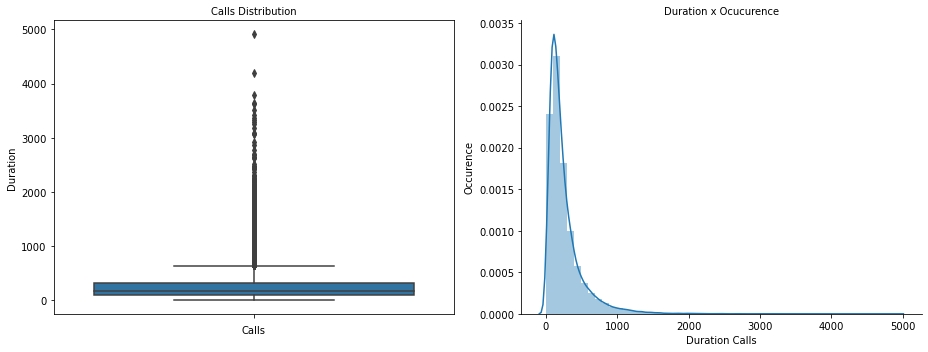

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(y = 'duration', data = bank, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [20]:
print('1º Quartile: ', bank['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank['duration'].quantile(q = 1.00))
print('Duration calls above: ', bank['duration'].quantile(q = 0.75) + 
                      1.5*(bank['duration'].quantile(q = 0.75) - 
                           bank['duration'].quantile(q = 0.25)), 
      'are outliers')
print(f"outliers COUNT : {bank[bank['duration']>644.5]['age'].count()}")
print(f"outliers :{round(len(bank[bank['duration']>644.5])/len(bank['duration'])*100,2)}%")
print(f"DURATION MEAN  : {round(bank['duration'].mean(),1)}")
print(f"DURATION STD   : {round(bank['duration'].std(),1)}")

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  644.5 are outliers
outliers COUNT : 2963
outliers :7.19%
DURATION MEAN  : 258.3
DURATION STD   : 259.3


### 범주형 pieplot

In [21]:
def pie(data):
    count=0
    for i in data:
        fig = plt.figure(figsize=(13, 13))
        ax = fig.add_subplot()
        pie = ax.pie(x = data[i].value_counts(), autopct='%.1f%%')
        plt.title(data.columns[count],fontsize=30)
        plt.legend(pie[0],labels = data[i].unique(), loc='upper left')
        plt.show()
        count+=1
        print('\n')

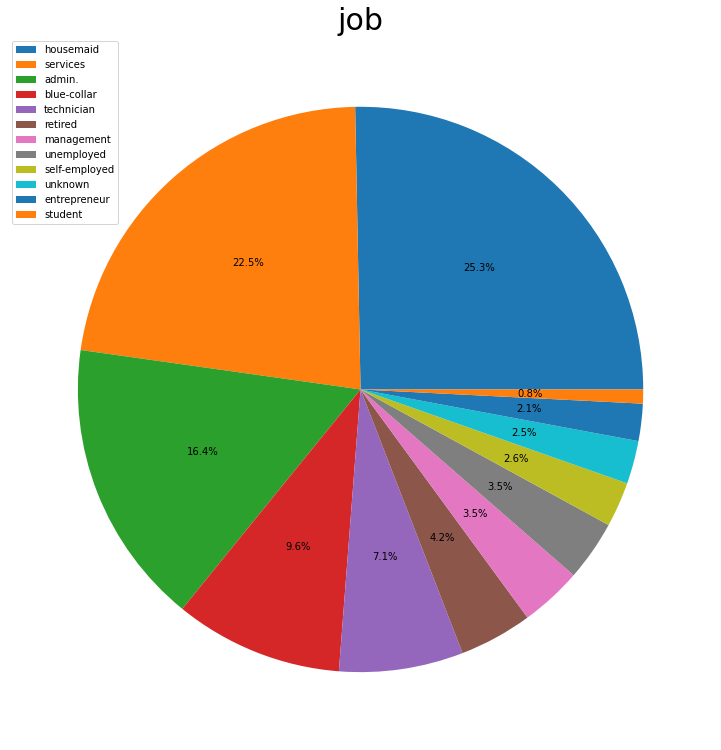

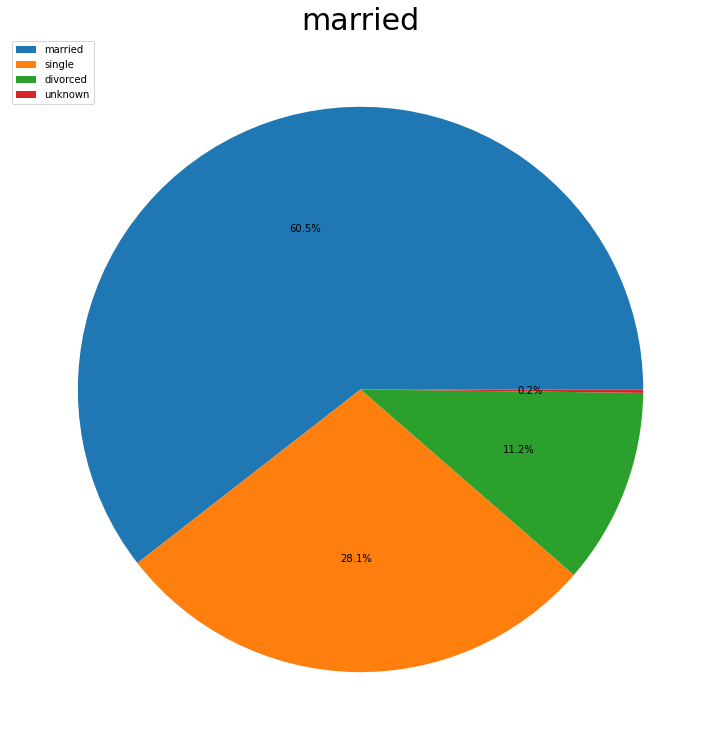

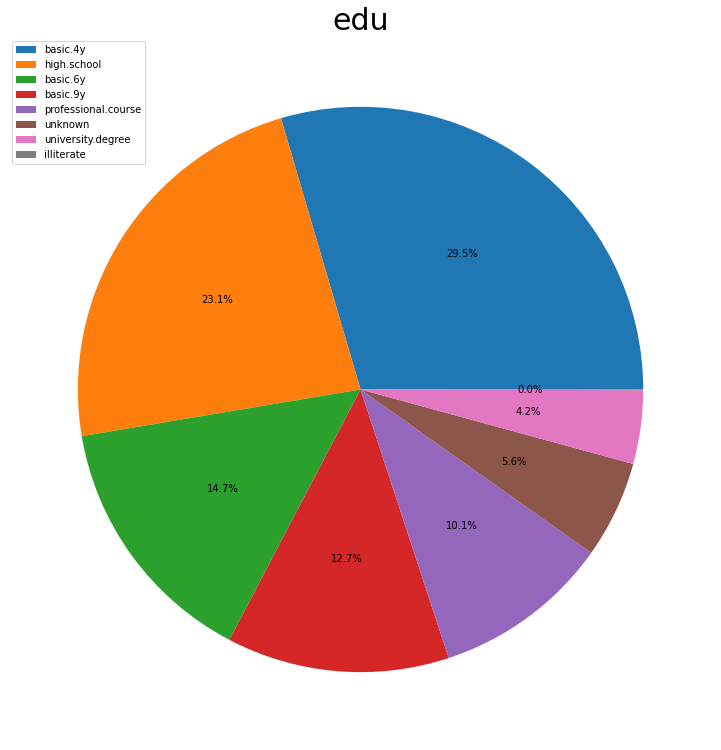

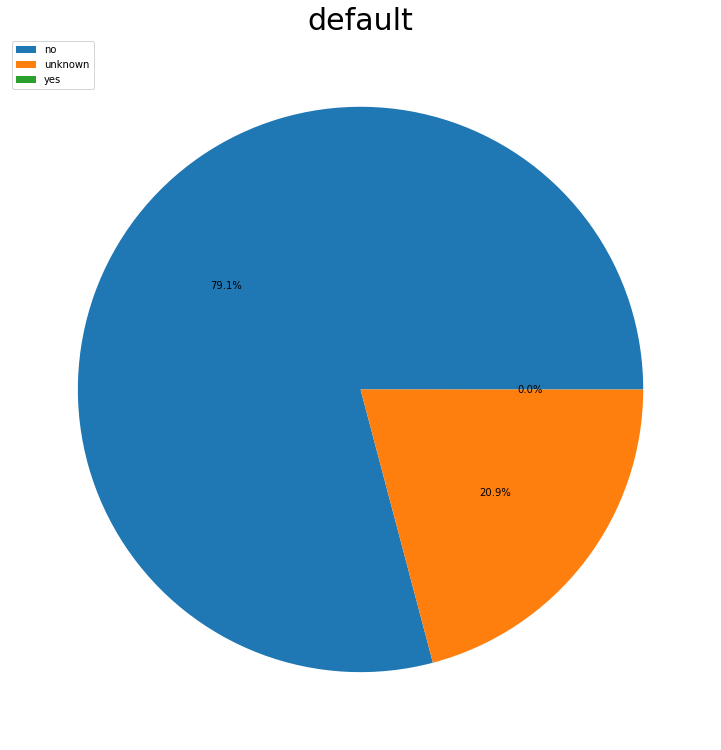

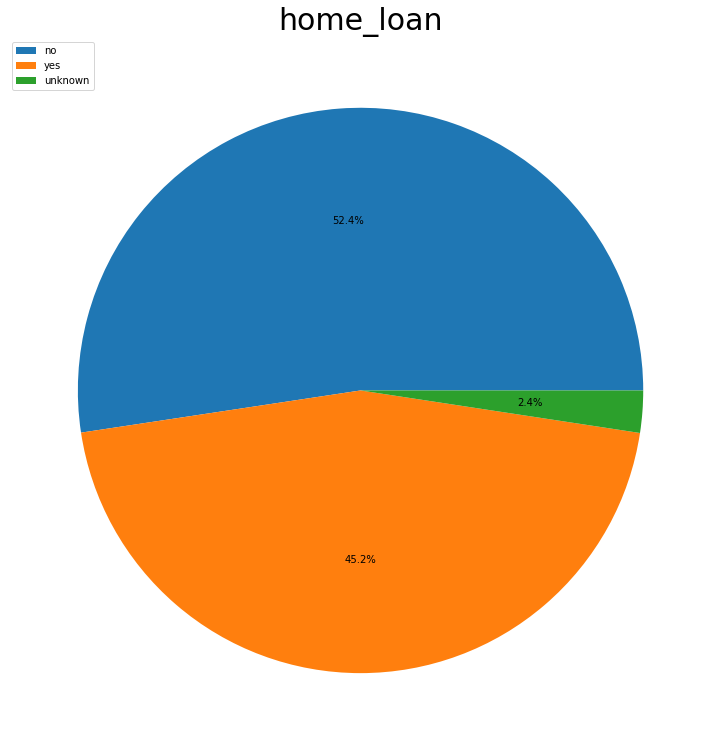

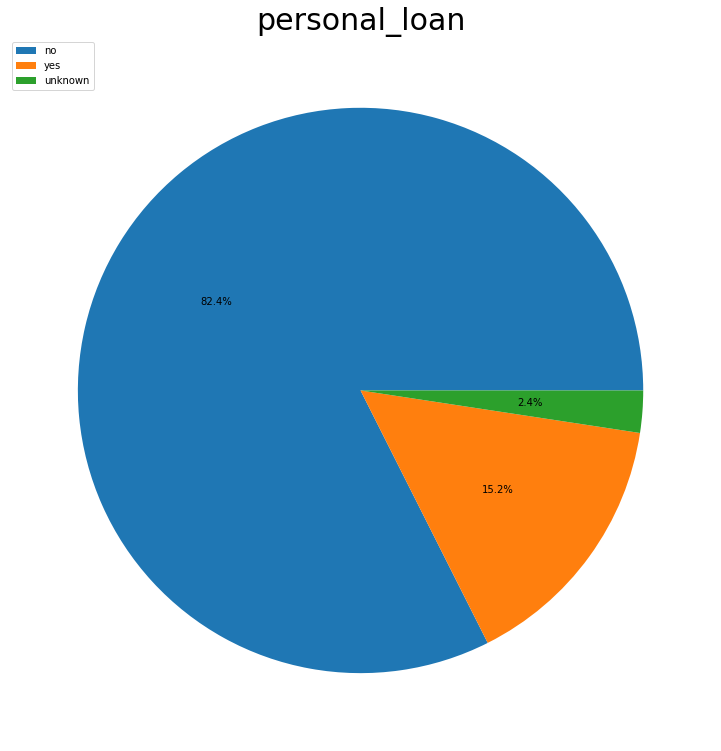

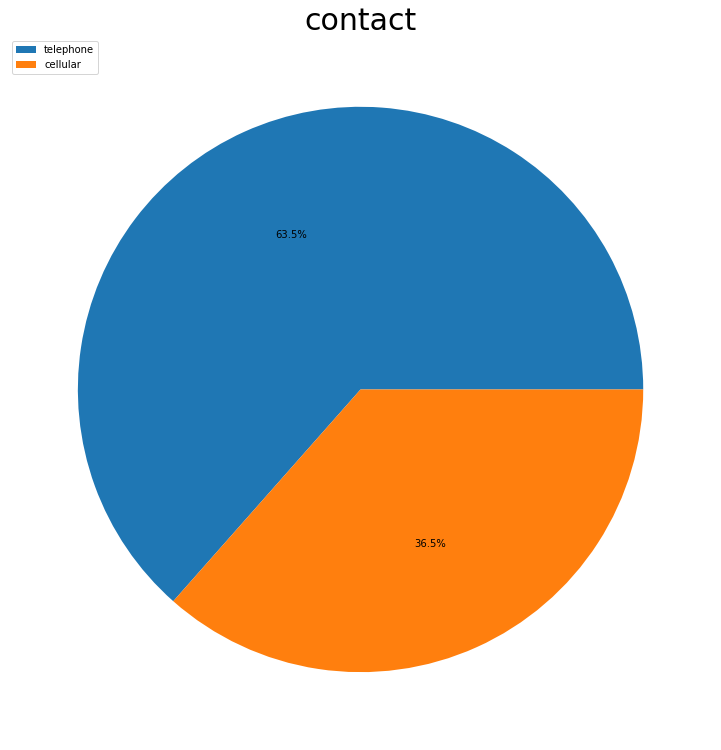

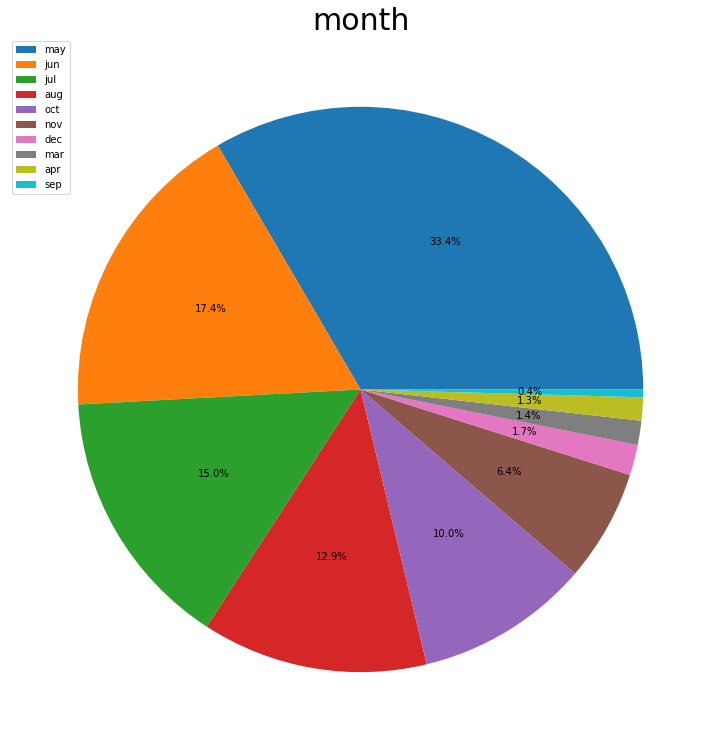

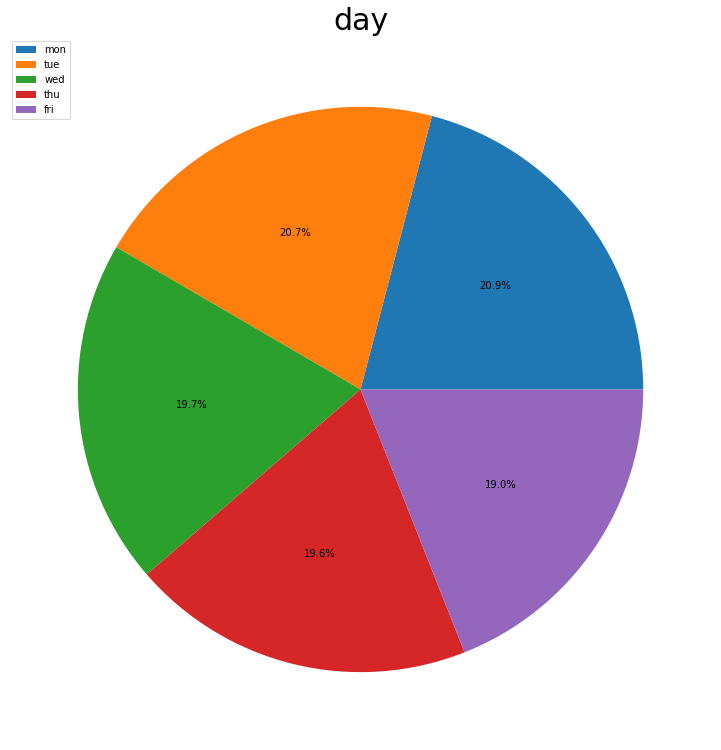

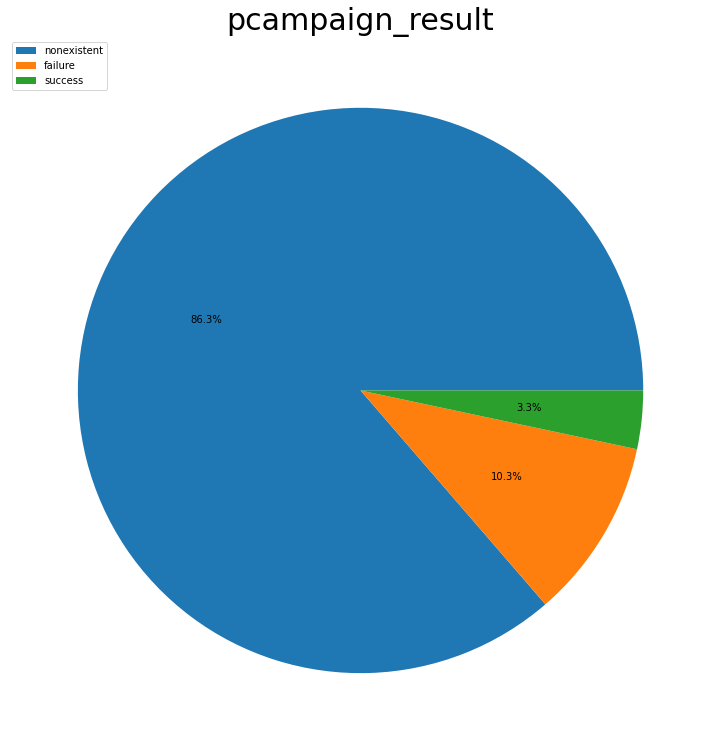

In [22]:
pie(bank_object)

### y변수와의 관계

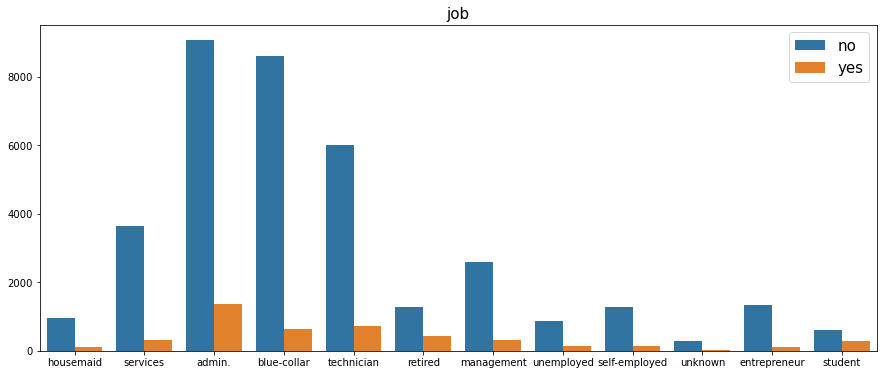

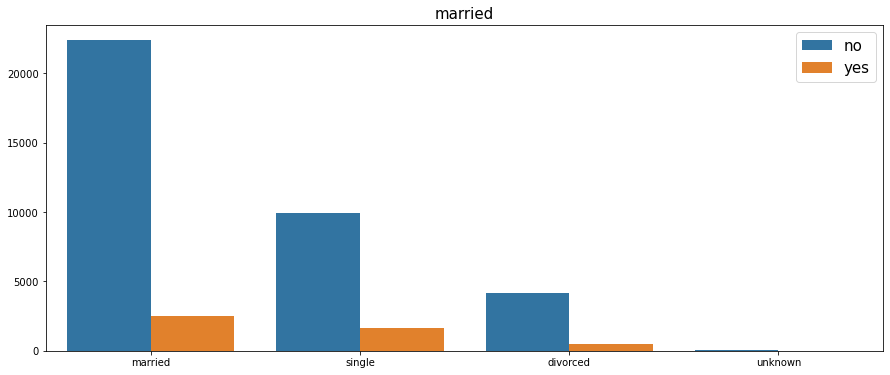

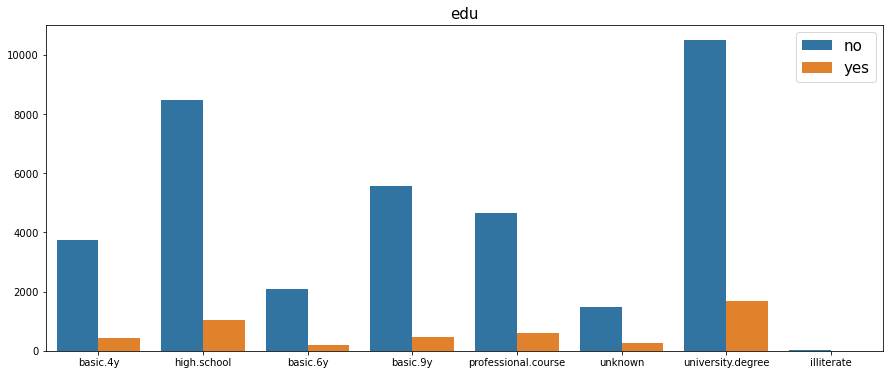

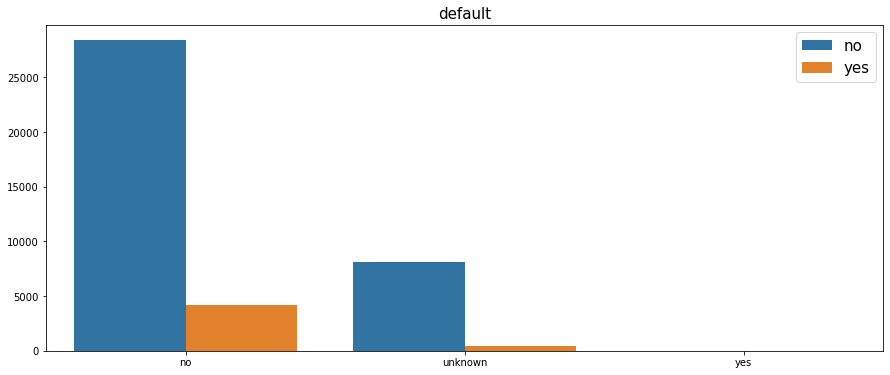

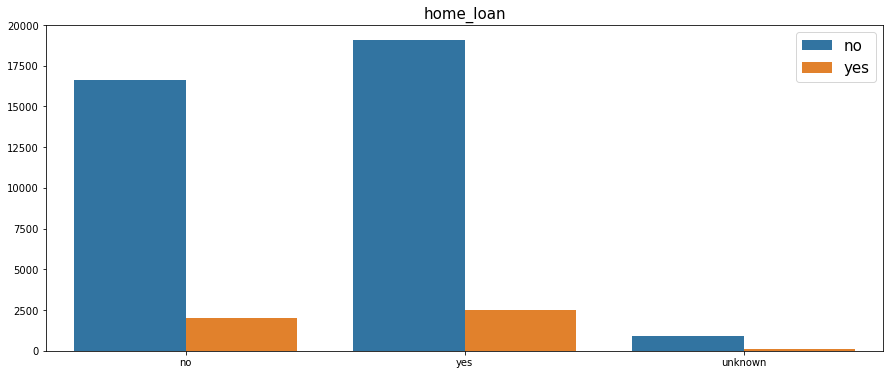

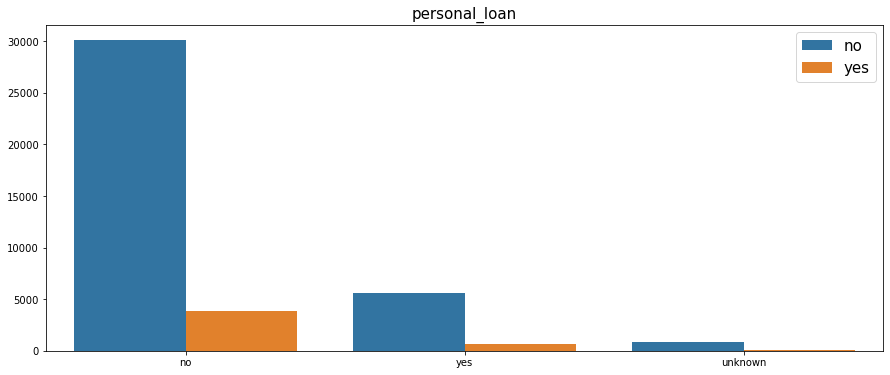

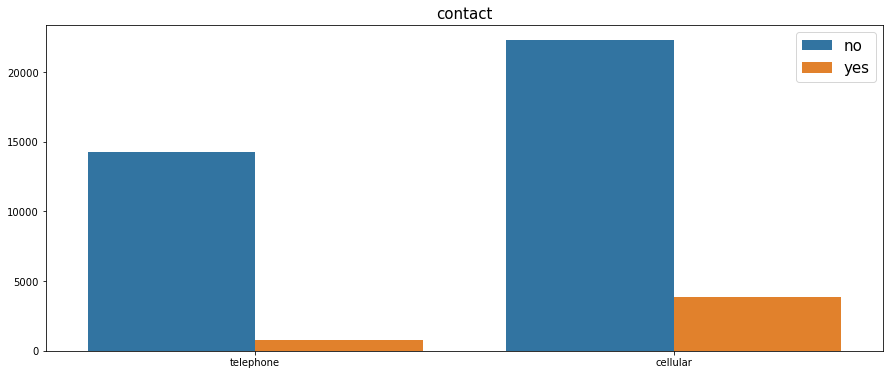

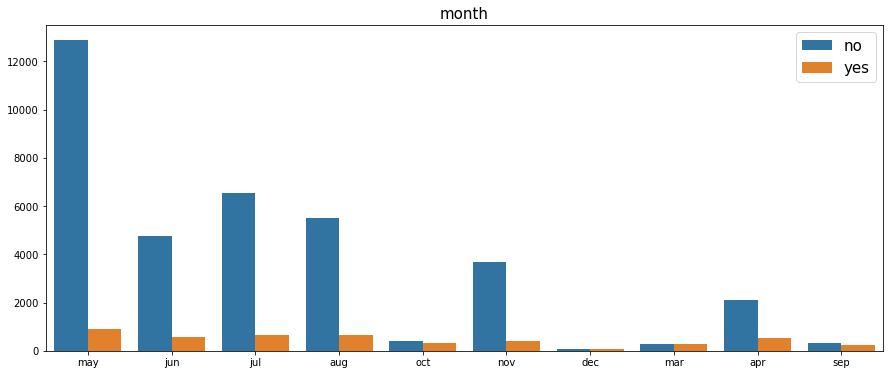

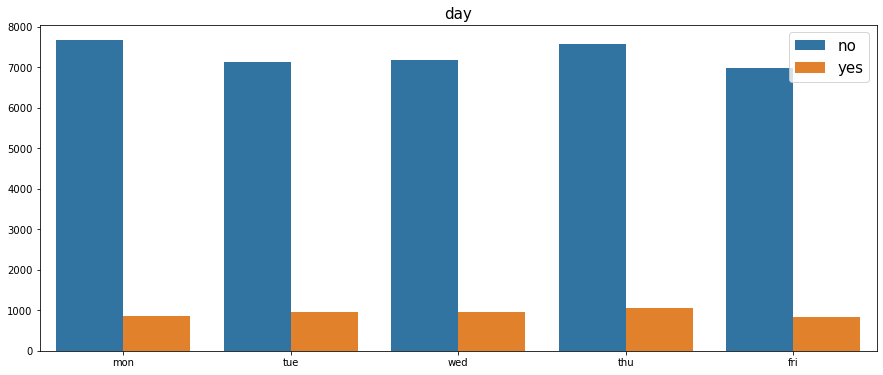

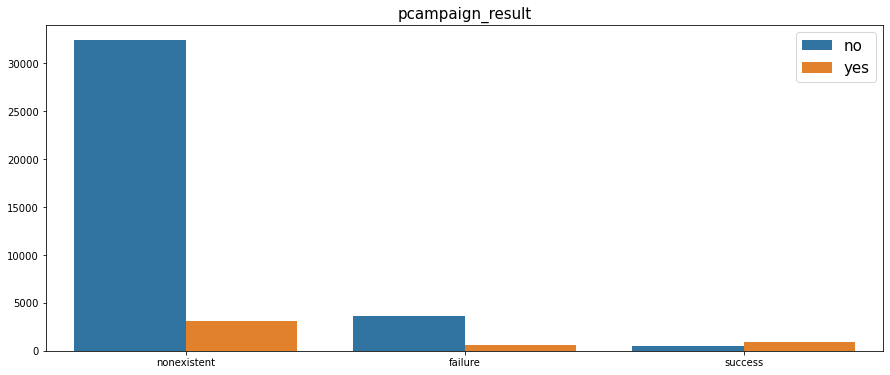

In [23]:
for column in bank_object:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=bank[column], hue=bank['y'])
    plt.legend(loc='upper right',fontsize=15)
    plt.title(column,fontsize=15)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

## 결측치 분포 확인

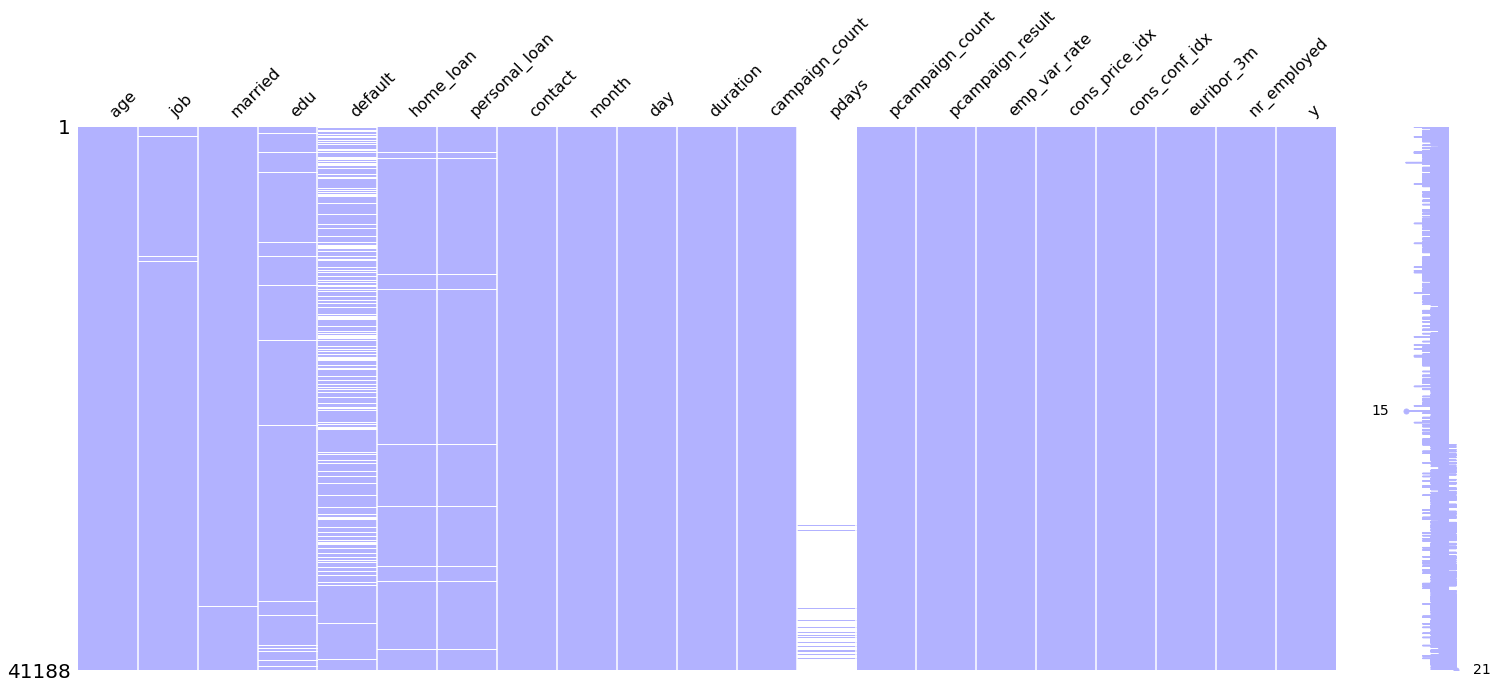

In [25]:
bank.replace('unknown', np.NaN, inplace=True)
bank.replace(999, np.NaN, inplace=True)

# 결측치 분포 확인하기
import missingno
missingno.matrix(bank, color=(0.7, 0.7, 1.0))
plt.show()

In [116]:
bank.isnull().sum()

age                     0
job                   330
married                80
edu                  1731
default              8597
home_loan             990
personal_loan         990
contact                 0
month                   0
day                     0
duration                2
campaign_count          0
pdays               39673
pcampaign_count         0
pcampaign_result        0
emp_var_rate            0
cons_price_idx          0
cons_conf_idx           0
euribor_3m              0
nr_employed             0
y                       0
dtype: int64

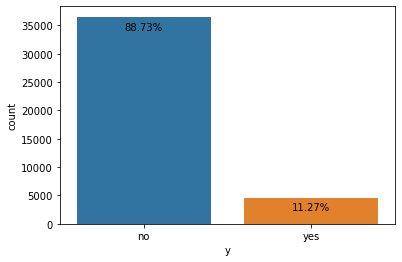

In [26]:
# 값 라벨로 지정하는 함수
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}%".format(y_value/total*100)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)


ax = sns.countplot(x = bank['y'])  #Imbalanced dataset
label_values(ax, spacing=-15)
plt.show()

# feature engineering

## 표준화

In [27]:
def minmax(data,columns):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    return scaler.fit_transform(data[columns])

def standard(data,columns):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    return scaler.fit_transform(data[columns])

def abs(data,columns):
    from sklearn.preprocessing import MaxAbsScaler
    scaler = MaxAbsScaler()
    return scaler.fit_transform(data[columns])

## 인코딩

In [28]:
# 레이블 인코딩 함수
def label(bank_object):
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X = LabelEncoder()
    bank_object2 = bank_object.copy()
    for i in bank_object:
        bank_object2[i] = labelencoder_X.fit_transform(bank_object[i])
    return bank_object2

# 원-핫 인코딩
def onehot(bank_object):
    return pd.get_dummies(bank_object)

## 데이터프레임으로 합치기

In [29]:
# categorical 형식 추출 함수
categorical = bank_x.loc[:, ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

# numerical 형식 추출 함수
numerical = numerical = [x for x in bank_x.columns if x not in ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

### Standard + Label

In [30]:
bank_standard = standard(bank_x,numerical)
bank_standard = pd.DataFrame(bank_standard, columns=numerical)
bank_label = label(categorical)
standard_label = pd.concat([bank_standard, bank_label], axis=1)
standard_label

,age,duration,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,job,married,edu,default,home_loan,personal_loan,contact,month,day,pcampaign_result
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,3,1,0,0,0,0,1,6,1,1
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,7,1,3,1,0,0,1,6,1,1
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,7,1,3,0,2,0,1,6,1,1
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,1,1,0,0,0,1,6,1,1
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,5,1,5,0,2,0,0,7,0,1
41184,0.573445,0.481012,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1,1,5,0,0,0,0,7,0,1
41185,1.533034,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,5,1,6,0,2,0,0,7,0,1
41186,0.381527,0.708569,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,9,1,5,0,0,0,0,7,0,1


### Standard + Onehot

In [31]:
bank_standard = standard(bank_x,numerical)
bank_standard = pd.DataFrame(bank_standard, columns=numerical)
bank_onehot = onehot(categorical)
standard_onehot = pd.concat([bank_standard, bank_onehot], axis=1)
standard_onehot

,age,duration,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,...,month_oct,month_sep,day_fri,day_mon,day_thu,day_tue,day_wed,pcampaign_result_failure,pcampaign_result_nonexistent,pcampaign_result_success
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0,0,0,1,0,0,0,0,1,0
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0,0,0,1,0,0,0,0,1,0
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0,0,0,1,0,0,0,0,1,0
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0,0,0,1,0,0,0,0,1,0
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0,0,1,0,0,0,0,0,1,0
41184,0.573445,0.481012,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0,0,1,0,0,0,0,0,1,0
41185,1.533034,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0,0,1,0,0,0,0,0,1,0
41186,0.381527,0.708569,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0,0,1,0,0,0,0,0,1,0


### MinMax + Label

In [32]:
bank_minmax = minmax(bank_x,numerical)
bank_minmax = pd.DataFrame(bank_minmax, columns=numerical)
bank_label = label(categorical)
minmax_label = pd.concat([bank_minmax, bank_label], axis=1)
minmax_label

,age,duration,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,job,married,edu,default,home_loan,personal_loan,contact,month,day,pcampaign_result
0,0.481481,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,3,1,0,0,0,0,1,6,1,1
1,0.493827,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,1,0,0,1,6,1,1
2,0.246914,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,0,2,0,1,6,1,1
3,0.283951,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0,1,1,0,0,0,1,6,1,1
4,0.481481,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5,1,5,0,2,0,0,7,0,1
41184,0.358025,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,1,1,5,0,0,0,0,7,0,1
41185,0.481481,0.038430,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5,1,6,0,2,0,0,7,0,1
41186,0.333333,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,9,1,5,0,0,0,0,7,0,1


### MinMax + Onehot

In [33]:
bank_minmax = minmax(bank_x,numerical)
bank_minmax = pd.DataFrame(bank_minmax, columns=numerical)
bank_onehot = onehot(categorical)
minmax_onehot = pd.concat([bank_minmax, bank_onehot], axis=1)
minmax_onehot

,age,duration,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,...,month_oct,month_sep,day_fri,day_mon,day_thu,day_tue,day_wed,pcampaign_result_failure,pcampaign_result_nonexistent,pcampaign_result_success
0,0.481481,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0,0,0,1,0,0,0,0,1,0
1,0.493827,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0,0,0,1,0,0,0,0,1,0
2,0.246914,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0,0,0,1,0,0,0,0,1,0
3,0.283951,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0,0,0,1,0,0,0,0,1,0
4,0.481481,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0,0,1,0,0,0,0,0,1,0
41184,0.358025,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0,0,1,0,0,0,0,0,1,0
41185,0.481481,0.038430,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0,0,1,0,0,0,0,0,1,0
41186,0.333333,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0,0,1,0,0,0,0,0,1,0


### Abs + Label

In [34]:
bank_abs = abs(bank_x,numerical)
bank_abs = pd.DataFrame(bank_abs, columns=numerical)
bank_label = label(categorical)
abs_label = pd.concat([bank_abs, bank_label], axis=1)
abs_label

,age,duration,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,job,married,edu,default,home_loan,personal_loan,contact,month,day,pcampaign_result
0,0.571429,0.053070,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,3,1,0,0,0,0,1,6,1,1
1,0.581633,0.030297,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,7,1,3,1,0,0,1,6,1,1
2,0.377551,0.045954,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,7,1,3,0,2,0,1,6,1,1
3,0.408163,0.030704,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,1,1,0,0,0,1,6,1,1
4,0.571429,0.062424,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.744898,0.067914,0.017857,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,5,1,5,0,2,0,0,7,0,1
41184,0.469388,0.077877,0.017857,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,1,1,5,0,0,0,0,7,0,1
41185,0.571429,0.038430,0.035714,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,5,1,6,0,2,0,0,7,0,1
41186,0.448980,0.089874,0.017857,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,9,1,5,0,0,0,0,7,0,1


### Abs + Onehot

In [35]:
bank_abs = abs(bank_x,numerical)
bank_abs = pd.DataFrame(bank_abs, columns=numerical)
bank_onehot = onehot(categorical)
abs_onehot = pd.concat([bank_abs, bank_onehot], axis=1)
abs_onehot

,age,duration,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,...,month_oct,month_sep,day_fri,day_mon,day_thu,day_tue,day_wed,pcampaign_result_failure,pcampaign_result_nonexistent,pcampaign_result_success
0,0.571429,0.053070,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,...,0,0,0,1,0,0,0,0,1,0
1,0.581633,0.030297,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,...,0,0,0,1,0,0,0,0,1,0
2,0.377551,0.045954,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,...,0,0,0,1,0,0,0,0,1,0
3,0.408163,0.030704,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,...,0,0,0,1,0,0,0,0,1,0
4,0.571429,0.062424,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.744898,0.067914,0.017857,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,...,0,0,1,0,0,0,0,0,1,0
41184,0.469388,0.077877,0.017857,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,...,0,0,1,0,0,0,0,0,1,0
41185,0.571429,0.038430,0.035714,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,...,0,0,1,0,0,0,0,0,1,0
41186,0.448980,0.089874,0.017857,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,...,0,0,1,0,0,0,0,0,1,0


### Label합쳐서 standard

In [46]:
bank_standard_la = standard(bank_x,numerical)
bank_standard_la = pd.DataFrame(bank_standard_la, columns=numerical)
bank_label = label(categorical)
bank_label = standard(bank_label, bank_label.columns)
bank_label = pd.DataFrame(bank_label,columns=categorical.columns)
standard_label_la = pd.concat([bank_standard, bank_label], axis=1)
standard_label_la

,age,duration,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,job,married,edu,default,home_loan,personal_loan,contact,month,day,pcampaign_result
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,0.192622
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.192622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0.354824,-0.283741,0.586399,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,0.192622
41184,0.573445,0.481012,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,-0.757982,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,0.192622
41185,1.533034,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0.354824,-0.283741,1.054464,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,0.192622
41186,0.381527,0.708569,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1.467630,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,0.192622


## 라벨값 변환 및 추출

In [36]:
y = bank.replace({"no":0, "yes":1})
y = y.iloc[:, -1]

##### 데이터 그룹 함수

In [37]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

In [38]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5
    return data

# modeling

##  model import

In [39]:
from sklearn.tree import DecisionTreeClassifier                                       # 의사결정나무
from sklearn.naive_bayes import GaussianNB                                            # 나이브 베이즈
from sklearn.neighbors import KNeighborsClassifier                                    # K-최근접 이웃
from sklearn.linear_model import Perceptron                                           # 퍼셉트론
from sklearn.linear_model import LogisticRegression                                   # 로지스틱 회귀 모델
from sklearn.svm import SVC                                                           # 서포트 벡터 머신(SVM)
from sklearn.neural_network import MLPClassifier                                      # 인공신경망(ANN)
# from sklearn.ensemble import VotingClassifier                                        # 보팅
from sklearn.ensemble import BaggingClassifier                                        # 배깅
from sklearn.ensemble import AdaBoostClassifier                                       # 부스팅
from sklearn.ensemble import GradientBoostingClassifier                               # 그래디언트 부스트
from sklearn.ensemble import RandomForestClassifier                                   # 랜덤포레스트
from xgboost import XGBClassifier                                                     # XGBoost
from lightgbm import LGBMClassifier                                                   # LightGBM
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis               # 이차판별분석(QDA)
from sklearn.multiclass import OneVsOneClassifier                                     # OVO
from sklearn.multiclass import OneVsRestClassifier                                    # OVR

In [195]:
def modeling(X_train, X_test, y_train, y_test):
    from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
    
    dt = DecisionTreeClassifier(max_depth=5)
    nb = GaussianNB()
    knn = KNeighborsClassifier()
    pc = Perceptron()
    lr = LogisticRegression()
    svc = SVC()
    ovo = OneVsOneClassifier(DecisionTreeClassifier())
    ovr = OneVsRestClassifier(DecisionTreeClassifier())
    mlp = MLPClassifier()
    bag = BaggingClassifier()
    ada = AdaBoostClassifier()
    rf = RandomForestClassifier(max_depth=5)
    gb = GradientBoostingClassifier()
    xgb = XGBClassifier()
    lgbm = LGBMClassifier()
    qda = QuadraticDiscriminantAnalysis()
    
    model = [dt, nb, knn, pc, lr, svc, ovo, ovr, mlp, bag, ada, rf, gb, xgb, lgbm, qda]
    #model = [lgbm]
    model_name = ["Decision Tree", "Naive Bayes", "KNN", "Perceptron", "Logistic Regression", 
                  "SVC", "OvO", "OvR", "MLP", "Bagging", "AdaBoost", "RandomForest", 
                  "GradientBoost", "XGBoost", "LightGBM", "QDA"]
    #model_name = ["lgbm"]
    scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    for i in model:
        i.fit(X_train, y_train)
        y_pred = i.predict(X_test)
        scores.append(round(i.score(X_test, y_test), 3))
        precision_scores.append(round(precision_score(y_test, y_pred, average="macro"),3))
        recall_scores.append(round(recall_score(y_test, y_pred, average="macro"),3))
        f1_scores.append(round(f1_score(y_test, y_pred, average='weighted'),3))

    return pd.DataFrame(data={"model name":model_name, "score":scores,
                              "precision":precision_scores, "recall":recall_scores, 
                              "f1":f1_scores})

In [198]:
# categorical 형식 추출 함수
categorical = bank_x.loc[:, ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

# numerical 형식 추출 함수
numerical = [x for x in bank_x.columns if x not in ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

In [199]:
minmax_label

,age,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,job,married,edu,default,home_loan,personal_loan,contact,month,day,pcampaign_result
0,0.0,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,3,1,0,0,0,0,1,6,1,1
1,0.0,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,1,0,0,1,6,1,1
2,0.0,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,0,2,0,1,6,1,1
3,0.0,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0,1,1,0,0,0,1,6,1,1
4,0.0,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5,1,5,0,2,0,0,7,0,1
41184,0.0,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,1,1,5,0,0,0,0,7,0,1
41185,0.0,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5,1,6,0,2,0,0,7,0,1
41186,0.0,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,9,1,5,0,0,0,0,7,0,1


## 데이터셋 나누기

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(minmax_label, y, stratify=y, random_state=104)

## 모델링

In [201]:
result_ml = modeling(X_train, X_test, y_train, y_test)

[21:21:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [202]:
result_ml.sort_values(by='f1')

,model name,score,precision,recall,f1
6,OvO,0.823,0.602,0.630,0.834
15,QDA,0.887,0.444,0.500,0.834
3,Perceptron,0.888,0.747,0.513,0.841
1,Naive Bayes,0.832,0.639,0.699,0.847
7,OvR,0.851,0.630,0.631,0.852
2,KNN,0.890,0.718,0.601,0.870
9,Bagging,0.889,0.714,0.635,0.876
5,SVC,0.899,0.780,0.606,0.877
11,RandomForest,0.902,0.819,0.598,0.877
10,AdaBoost,0.902,0.808,0.605,0.878


In [203]:
import plotly.express as px
px.histogram(result_ml, x="model name", y="f1", color="model name")

## 하이퍼파라미터 탐색

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standard_label, y, stratify=y, random_state=29)

def gs_logistic(X_train, y_train):
    from sklearn.linear_model import LogisticRegression
    logi = LogisticRegression()
    param_grid=dict(max_iter=[100, 200, 300],
                   C=[0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    grid_search = GridSearchCV(logi, param_grid=param_grid, cv=5, verbose=10)
    grid_search.fit(X_train, y_train)
    return grid_search

def gs_logistic(X_train, y_train):
    from sklearn.linear_model import LogisticRegression
    logi = LogisticRegression()
    param_grid=dict(max_iter=[100, 200, 300],
                   C=[0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    grid_search = GridSearchCV(logi, param_grid=param_grid, cv=5, verbose=10)
    grid_search.fit(X_train, y_train)
    return grid_search

def gs_decision(X_train, y_train):
    from sklearn.tree import DecisionTreeClassifier
    decision = DecisionTreeClassifier()
    param_grid = dict(max_depth=[6, 7, 8, 9, 10])
    grid_search = GridSearchCV(decision, param_grid=param_grid, cv=5, verbose=10)
    grid_search.fit(X_train, y_train)
    return grid_search

def gs_perceptron(X_train,y_train):
    from sklearn.linear_model import Perceptron 
    pc=Perceptron()
    param_grid=dict(penalty=["l1"])
    grid_search=GridSearchCV(pc, param_grid=param_grid,cv=2,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_svc(X_train,y_train):
    from sklearn.svm import SVC
    svc=SVC()
    param_grid=dict(C=[0.7, 0.8, 0.9, 1.0, 1.1, 1.2], gamma=[0.01, 1, 5])
    grid_search=GridSearchCV(svc, param_grid=param_grid,cv=2,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_ovo(X_train,y_train):
    from sklearn.multiclass import OneVsOneClassifier
    ovo=OneVsOneClassifier()
    param_grid=dict(estimator=["LogisticRegression"])
    grid_search=GridSearchCV(ovo, param_grid=param_grid,cv=2,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_ovr(X_train,y_train):
    from sklearn.multiclass import OneVsRestClassifier
    ovr=OneVsRestClassifier()
    param_grid=dict(estimator=["LogisticRegression"])
    grid_search=GridSearchCV(ovr, param_grid=param_grid,cv=2,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_mlp(X_train, y_train):
    from sklearn.neural_network import MLPClassifier
    mlp = MLPClassifier()
    param_grid = dict(hidden_layer_sizes=[100, 200], activation=['tanh'])
    grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=5, verbose=10)
    grid_search.fit(X_train, y_train)
    return grid_search

def gs_baggingclassifier(X_train,y_train):
    from sklearn.ensemble import BaggingClassifier
    bg=BaggingClassifier()
    param_grid=dict(n_estimators=[10,50,100,150], max_features=['auto',2,3,4])
    grid_search=GridSearchCV(bg, param_grid=param_grid,cv=5,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_randomforest(X_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    rf=RandomForestClassifier()
    param_grid=dict(n_estimators=[100,200,300],
                   max_depth=['None',5,6,7],
                   max_features=['auto','sqrt'])
    grid_search=GridSearchCV(rf, param_grid=param_grid,cv=5,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_adaboostclassifier(X_train,y_train):
    from sklearn.ensemble import AdaBoostClassifier
    ad=AdaBoostClassifier()
    param_grid=dict(n_estimators=[50,300,400,500,600])
    grid_search=GridSearchCV(ad, param_grid=param_grid,cv=5,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_gradientboostingclassifier(X_train,y_train):
    from sklearn.ensemble import GradientBoostingClassifier
    gb=GradientBoostingClassifier()
    param_grid=dict(n_estimators=[100,300,400,500,600],
                   max_depth=[3,5,6,7],
                   max_features=['None','auto'])
    grid_search=GridSearchCV(gb, param_grid=param_grid,cv=5,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_xgclassifier(X_train,y_train):
    from xgboost import XGBClassifier
    xg=XGBClassifier()
    param_grid=dict(n_estimators=[100,300,400,500,600],
                   max_depth=[3,4,5,6],
                   gamma=[0,0.1,0.2,0.3,0.4,0.5])
    grid_search=GridSearchCV(xg, param_grid=param_grid,cv=2,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_lgbm(X_train,y_train):
    from lightgbm import LGBMClassifier    
    from sklearn.model_selection import GridSearchCV
    lgbm = LGBMClassifier()
    param_grid = dict(n_estimators=[100, 500, 600, 700], boosting_type=["rf", "gbdt"],
                   max_depth=[-1,5,6,7], gamma=[0, 0.1, 0.2, 0.3, 0.4, 0.5])
    grid_search = GridSearchCV(lgbm, param_grid=param_grid, cv=5, verbose=10)
    grid_search.fit(X_train, y_train)
    return grid_search

# 추가 제안

## pdays 제거

In [107]:
bank_pdays_del = bank_x.drop("pdays", axis=1)

In [108]:
# categorical 형식 추출 함수
categorical = bank_pdays_del.loc[:, ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

# numerical 형식 추출 함수
numerical = [x for x in bank_pdays_del.columns if x not in ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

In [109]:
bank_minmax = minmax(bank_pdays_del, numerical)
bank_minmax = pd.DataFrame(bank_minmax, columns=numerical)
bank_label = label(categorical)
minmax_label = pd.concat([bank_minmax, bank_label], axis=1)
minmax_label

,age,duration,campaign_count,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,job,married,edu,default,home_loan,personal_loan,contact,month,day,pcampaign_result
0,0.0,0.053070,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,3,1,0,0,0,0,1,6,1,1
1,0.0,0.030297,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,1,0,0,1,6,1,1
2,0.0,0.045954,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,0,2,0,1,6,1,1
3,0.0,0.030704,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0,1,1,0,0,0,1,6,1,1
4,0.0,0.062424,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,0.067914,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5,1,5,0,2,0,0,7,0,1
41184,0.0,0.077877,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,1,1,5,0,0,0,0,7,0,1
41185,0.0,0.038430,0.018182,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5,1,6,0,2,0,0,7,0,1
41186,0.0,0.089874,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,9,1,5,0,0,0,0,7,0,1


### 모델링

In [110]:
minmax_label

,age,duration,campaign_count,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,job,married,edu,default,home_loan,personal_loan,contact,month,day,pcampaign_result
0,0.0,0.053070,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,3,1,0,0,0,0,1,6,1,1
1,0.0,0.030297,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,1,0,0,1,6,1,1
2,0.0,0.045954,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,0,2,0,1,6,1,1
3,0.0,0.030704,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0,1,1,0,0,0,1,6,1,1
4,0.0,0.062424,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,0.067914,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5,1,5,0,2,0,0,7,0,1
41184,0.0,0.077877,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,1,1,5,0,0,0,0,7,0,1
41185,0.0,0.038430,0.018182,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5,1,6,0,2,0,0,7,0,1
41186,0.0,0.089874,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,9,1,5,0,0,0,0,7,0,1


In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(minmax_label, y, stratify=y, random_state=104)

In [112]:
result_pays_del = modeling(X_train, X_test, y_train, y_test)

[18:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [114]:
result_pays_del.sort_values("f1", ascending=False)

,model name,score,precision,recall,f1
12,gb,0.921725,0.813177,0.772253,0.790708
14,lgbm,0.919685,0.805615,0.772609,0.787780
13,xgb,0.918326,0.802122,0.768080,0.783662
0,dt,0.917549,0.798831,0.770277,0.783534
9,bag,0.907837,0.774083,0.732442,0.750807
10,ada,0.912596,0.805093,0.698997,0.736844
4,lr,0.912013,0.805781,0.692271,0.731491
6,ovo,0.887540,0.720839,0.735304,0.727714
7,ovr,0.888414,0.722328,0.732786,0.727370
8,mlp,0.907740,0.789312,0.680456,0.717627


In [115]:
import plotly.express as px
px.histogram(result_pays_del, x="model name", y="f1", color="model name")


## duration 제거

In [119]:
bank_duration_del = bank_x.drop(['duration'], axis=1)

In [120]:
# categorical 형식 추출 함수
categorical = bank_duration_del.loc[:, ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

# numerical 형식 추출 함수
numerical = [x for x in bank_duration_del.columns if x not in ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

In [121]:
bank_minmax = minmax(bank_duration_del,numerical)
bank_minmax = pd.DataFrame(bank_minmax, columns=numerical)
bank_label = label(categorical)
minmax_label = pd.concat([bank_minmax, bank_label], axis=1)
minmax_label

,age,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,job,married,edu,default,home_loan,personal_loan,contact,month,day,pcampaign_result
0,0.0,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,3,1,0,0,0,0,1,6,1,1
1,0.0,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,1,0,0,1,6,1,1
2,0.0,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,0,2,0,1,6,1,1
3,0.0,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0,1,1,0,0,0,1,6,1,1
4,0.0,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5,1,5,0,2,0,0,7,0,1
41184,0.0,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,1,1,5,0,0,0,0,7,0,1
41185,0.0,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5,1,6,0,2,0,0,7,0,1
41186,0.0,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,9,1,5,0,0,0,0,7,0,1


### 모델링

In [122]:
result_duration_del = modeling(X_train, X_test, y_train, y_test)
result_duration_del.sort_values(by='f1', ascending=False)

[20:21:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model name,score,precision,recall,f1
12,gb,0.921725,0.813177,0.772253,0.790708
14,lgbm,0.919685,0.805615,0.772609,0.787780
13,xgb,0.918326,0.802122,0.768080,0.783662
0,dt,0.917549,0.798831,0.770277,0.783534
8,mlp,0.912887,0.784477,0.766521,0.775076
9,bag,0.907934,0.775702,0.725723,0.747160
10,ada,0.912596,0.805093,0.698997,0.736844
4,lr,0.912013,0.805781,0.692271,0.731491
7,ovr,0.888900,0.723943,0.737952,0.730617
6,ovo,0.887054,0.719328,0.731268,0.725051


In [123]:
import plotly.express as px
px.histogram(result_duration_del, x="model name", y="f1", color="model name")

### 모델링

## 결측치 삭제

In [ ]:
bank_x_missing_cut = bank.replace("unknown", np.NaN)
bank_x_missing_cut = bank_x_missing_cut.dropna(axis=0)

In [ ]:
y = bank_x_missing_cut.replace({"no":0, "yes":1})
y = y.iloc[:, -1]
bank_x_missing_cut = bank_x_missing_cut.drop("y", axis=1).reset_index()

In [ ]:
# categorical 형식 추출 함수
categorical = bank_x_missing_cut.loc[:, ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

# numerical 형식 추출 함수
numerical = [x for x in bank_x_missing_cut.columns if x not in ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

In [ ]:
bank_minmax = minmax(bank_x_missing_cut,numerical)
bank_minmax = pd.DataFrame(bank_minmax, columns=numerical)
bank_label = label(categorical)
minmax_label = pd.concat([bank_minmax, bank_label], axis=1)
minmax_label_missing_cut = minmax_label.iloc[:, 1:]

### 모델링

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(minmax_label_missing_cut, y, stratify=y, random_state=104)

In [ ]:
result_ml = modeling(X_train, X_test, y_train, y_test)

In [ ]:
result_ml

In [ ]:
import plotly.express as px
fig = px.histogram(result_ml, x="model name", y="f1", color="model name", text_auto=True,
                  title="모델별 f1 스코어 비교")
fig.show()

## 칼럼 5개 삭제

In [52]:
bank_delete=bank_x.drop(['emp_var_rate','cons_price_idx',
                        'cons_conf_idx','euribor_3m',
                        'nr_employed'],axis=1)

In [54]:
bank_delete

,age,job,married,edu,default,home_loan,personal_loan,contact,month,day,duration,campaign_count,pdays,pcampaign_count,pcampaign_result
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent


In [55]:
bank_delete.loc[bank_delete['pdays']==999,'pdays']=-1

In [56]:
# categorical 형식 추출 함수
categorical = bank_delete.loc[:, ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

# numerical 형식 추출 함수
numerical = [x for x in bank_delete.columns if x not in ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

In [58]:
bank_minmax = minmax(bank_delete,numerical)
bank_minmax = pd.DataFrame(bank_minmax, columns=numerical)
bank_label = label(categorical)
minmax_label = pd.concat([bank_minmax, bank_label], axis=1)
minmax_label

,age,duration,campaign_count,pdays,pcampaign_count,job,married,edu,default,home_loan,personal_loan,contact,month,day,pcampaign_result
0,0.481481,0.053070,0.000000,0.0,0.000000,3,1,0,0,0,0,1,6,1,1
1,0.493827,0.030297,0.000000,0.0,0.000000,7,1,3,1,0,0,1,6,1,1
2,0.246914,0.045954,0.000000,0.0,0.000000,7,1,3,0,2,0,1,6,1,1
3,0.283951,0.030704,0.000000,0.0,0.000000,0,1,1,0,0,0,1,6,1,1
4,0.481481,0.062424,0.000000,0.0,0.000000,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.067914,0.000000,0.0,0.000000,5,1,5,0,2,0,0,7,0,1
41184,0.358025,0.077877,0.000000,0.0,0.000000,1,1,5,0,0,0,0,7,0,1
41185,0.481481,0.038430,0.018182,0.0,0.000000,5,1,6,0,2,0,0,7,0,1
41186,0.333333,0.089874,0.000000,0.0,0.000000,9,1,5,0,0,0,0,7,0,1


### 모델링

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(minmax_label, y, stratify=y, random_state=104)

In [60]:
result_delete = modeling(X_train, X_test, y_train, y_test)

[17:56:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [64]:
result_delete.sort_values(by='f1',ascending=False)

,model name,score,precision,recall,f1
14,lgbm,0.915801,0.800296,0.743702,0.767875
12,gb,0.915606,0.804310,0.730798,0.760557
13,xgb,0.912013,0.788468,0.734795,0.757744
0,dt,0.909197,0.790810,0.693319,0.728554
9,bag,0.903953,0.766327,0.699395,0.726033
10,ada,0.905215,0.773676,0.690322,0.721521
8,mlp,0.906380,0.780977,0.684205,0.718668
15,qda,0.896572,0.741119,0.692978,0.713145
1,nb,0.879577,0.699749,0.703346,0.701522
7,ovr,0.875983,0.692810,0.702451,0.697440


In [83]:
import plotly.express as px
px.histogram(result_delete, x="model name", y="f1", color="model name")

## age 분류하기

In [75]:
bank_age=age(bank_x)

In [76]:
# categorical 형식 추출 함수
categorical = bank_age.loc[:, ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

# numerical 형식 추출 함수
numerical = [x for x in bank_age.columns if x not in ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

In [78]:
bank_minmax = minmax(bank_age,numerical)
bank_minmax = pd.DataFrame(bank_minmax, columns=numerical)
bank_label = label(categorical)
minmax_label = pd.concat([bank_minmax, bank_label], axis=1)
minmax_label

,age,duration,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,job,married,edu,default,home_loan,personal_loan,contact,month,day,pcampaign_result
0,0.0,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,3,1,0,0,0,0,1,6,1,1
1,0.0,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,1,0,0,1,6,1,1
2,0.0,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,0,2,0,1,6,1,1
3,0.0,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0,1,1,0,0,0,1,6,1,1
4,0.0,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5,1,5,0,2,0,0,7,0,1
41184,0.0,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,1,1,5,0,0,0,0,7,0,1
41185,0.0,0.038430,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5,1,6,0,2,0,0,7,0,1
41186,0.0,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,9,1,5,0,0,0,0,7,0,1


### 모델링

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(minmax_label, y, stratify=y, random_state=104)

In [80]:
minmax_label

,age,duration,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,job,married,edu,default,home_loan,personal_loan,contact,month,day,pcampaign_result
0,0.0,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,3,1,0,0,0,0,1,6,1,1
1,0.0,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,1,0,0,1,6,1,1
2,0.0,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,0,2,0,1,6,1,1
3,0.0,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0,1,1,0,0,0,1,6,1,1
4,0.0,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5,1,5,0,2,0,0,7,0,1
41184,0.0,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,1,1,5,0,0,0,0,7,0,1
41185,0.0,0.038430,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5,1,6,0,2,0,0,7,0,1
41186,0.0,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,9,1,5,0,0,0,0,7,0,1


In [81]:
result_age = modeling(X_train, X_test, y_train, y_test)

[18:09:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [85]:
result_age.sort_values(by='f1',ascending=False)

,model name,score,precision,recall,f1
12,gb,0.921919,0.813208,0.774244,0.791911
14,lgbm,0.920754,0.809144,0.773588,0.789837
13,xgb,0.915898,0.794310,0.765960,0.779111
0,dt,0.916966,0.802458,0.750756,0.773217
9,bag,0.909974,0.781976,0.730635,0.752656
8,mlp,0.911042,0.790722,0.715055,0.745002
10,ada,0.912596,0.805093,0.698997,0.736844
4,lr,0.911333,0.802138,0.692265,0.730594
3,pc,0.906380,0.776289,0.698505,0.728463
6,ovo,0.887443,0.720297,0.732615,0.726195


In [86]:
import plotly.express as px
px.histogram(result_age, x="model name", y="f1", color="model name")

## duration 분류하기

In [ ]:
duration_missing_value = duration(bank_x)

In [ ]:
# categorical 형식 추출 함수
categorical = duration_missing_value.loc[:, ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

# numerical 형식 추출 함수
numerical = [x for x in duration_missing_value.columns if x not in ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

In [ ]:
bank_minmax = minmax(duration_missing_value,numerical)
bank_minmax = pd.DataFrame(bank_minmax, columns=numerical)
bank_label = label(categorical)
minmax_label = pd.concat([bank_minmax, bank_label], axis=1)
minmax_label 

### 모델링

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(minmax_label, y, stratify=y, random_state=104)

In [ ]:
result_duration_missing_value = modeling(X_train, X_test, y_train, y_test)

In [ ]:
result_duration_missing_value.sort_values(by='f1', ascending=False)

In [ ]:
import plotly.express as px
px.histogram(result_duration_missing_value, x="model name", y="f1", color="model name", histfunc='sum')

## age & duration 분류하기

In [ ]:
# age & duration 범주변환
bank_age = age(bank_x)
bank_age_duration_cate = duration(bank_age)

In [ ]:
# categorical 형식 추출 함수
categorical = bank_age_duration_cate.loc[:, ['age', 'job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'duration', 'pcampaign_result']]

# numerical 형식 추출 함수
numerical = [x for x in bank_age_duration_cate.columns if x not in ['age', 'job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'duration', 'pcampaign_result']]

In [ ]:
bank_minmax = minmax(bank_duration_cate, numerical)
bank_minmax = pd.DataFrame(bank_minmax, columns=numerical)
bank_label = label(categorical)
minmax_label = pd.concat([bank_minmax, bank_label], axis=1)
minmax_label

### 모델링

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(minmax_label, y, stratify=y, random_state=104)

In [ ]:
result_age_duration_cate = modeling(X_train, X_test, y_train, y_test)

In [ ]:
result_age_duration_cate.sort_values("f1", ascending=False)

In [ ]:
import plotly.express as px
px.histogram(result_age_duration_cate, x="model name", y="f1", color="model name")